In [27]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

def plot_complexity(func, title = 'Algorithm'):
    data = {
        'length of list':[], 
        'time taken': []
    }
    
    for i in range(1, 12):
        arr = np.random.randint(0, 1000*i, 1000*i)
        
        start = timer()
        func(arr)
        end = timer()
        
        print(f'Sorted {1000*i} elements in {end-start}s')
        
        data['length of list'].append(1000*i)
        data['time taken'].append(end-start)
        
    plt.plot(data['length of list'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('Length of array')
    plt.ylabel('Time taken')
        
#     plt.plot(data['length of list'], , label = 'O(n^2)')
    plt.legend()

## Selection Sort

In [3]:
def selection_sort(arr):
    swaps = 0
    for l in range(0, len(arr)-1):    #
        key_index = l
        
        # searching for min/max element
        for i in range(l+1, len(arr)):
            if arr[key_index] >= arr[i]:
                key_index = i
        else:
            # swapping 
            arr[l], arr[key_index] = arr[key_index], arr[l]
            swaps += 1
    
    #print(swaps)
    return arr

# selection_sort()

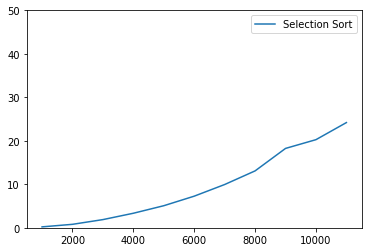

In [16]:
plot_complexity(selection_sort, title = 'Selection Sort')

## Insertion Sort

In [38]:
def insertion_sort(list):
    for index in range(1,len(list)):
        key = list[index]
        previousIndex = index - 1
        while list[previousIndex] > key and previousIndex >= 0:
            # swapping position
            temp = key
            list[previousIndex+1] = list[previousIndex]
            list[previousIndex] = temp
            previousIndex -= 1

    return list

print([29,10,14,37,13,3])
insertion_sort([29,10,14,37,13,3])

[29, 10, 14, 37, 13, 3]


[3, 10, 13, 14, 29, 37]

In [41]:
import numpy as np
%timeit insertion_sort(np.random.randint(0,1000, 10000))

20.8 s ± 1.05 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


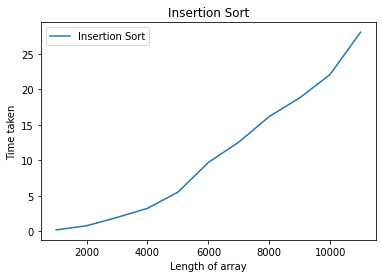

In [16]:
plot_complexity(insertion_sort, title='Insertion Sorbt')

## Quick Sort

In [26]:
def quick_sort(arr, lower_bound, upper_bound):
    
    # base case
    if upper_bound - lower_bound <= 1:
        return arr
    
    # pivot is the first element
    pivot = arr[lower_bound]
    left = lower_bound + 1
    right = upper_bound
    
    # partitioning subroutine, O(n)
    while left<=right:
        if arr[left] < pivot:
            left += 1
        elif arr[right] >= pivot:
            right -= 1
        else:
            # swapping
            arr[left], arr[right] = arr[right], arr[left]
            left += 1
            right -= 1
            
    # swapping the pivot with the "right" index, now the pivot is in its "sorted"/"final" position
    arr[lower_bound], arr[right] = arr[right], arr[lower_bound]
    
    pivot_index = right

    # recursively solving for both/all the sublists
    quick_sort(arr, lower_bound, pivot_index-1);         # 1st half/branch
    quick_sort(arr, pivot_index+1, upper_bound);         # 2nd half/branch
    
    return arr
    
arr = [3,44,38,5,47,15,36,26,27,2,46,4,19,50,48]
quick_sort(arr, 0, len(arr)-1)

[2, 3, 4, 5, 15, 19, 27, 26, 36, 38, 44, 46, 47, 50, 48]

Sorted 1000 elements in 0.01221129999976256s
Sorted 2000 elements in 0.022807800000009593s
Sorted 3000 elements in 0.031390299999657145s
Sorted 4000 elements in 0.031627800000023853s
Sorted 5000 elements in 0.0386754999999539s
Sorted 6000 elements in 0.0526703999998972s
Sorted 7000 elements in 0.056989899999734916s
Sorted 8000 elements in 0.07792019999988042s
Sorted 9000 elements in 0.08177639999985331s
Sorted 10000 elements in 0.08848029999990104s
Sorted 11000 elements in 0.11621849999983169s
Sorted 12000 elements in 0.11894130000018777s
Sorted 13000 elements in 0.161435800000163s
Sorted 14000 elements in 0.15314730000000054s
Sorted 15000 elements in 0.2934731999998803s
Sorted 16000 elements in 0.16785440000012386s
Sorted 17000 elements in 0.18742250000013883s
Sorted 18000 elements in 0.17777580000029047s
Sorted 19000 elements in 0.24134010000034323s
Sorted 20000 elements in 0.1977944000000207s
Sorted 21000 elements in 0.2713971000002857s
Sorted 22000 elements in 0.21627399999988484s


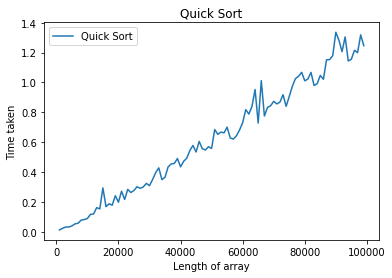

In [37]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

def plot_complexity_quick_sort():
    title = 'Quick Sort'
    data = {
        'length of list':[], 
        'time taken': []
    }
    
    for i in range(1, 100):
        arr = np.random.randint(0, 1000*i, 1000*i)
        
        start = timer()
        quick_sort(arr,0, len(arr)-1)
        end = timer()
        
        print(f'Sorted {1000*i} elements in {end-start}s')
        
        data['length of list'].append(1000*i)
        data['time taken'].append(end-start)
        
    plt.plot(data['length of list'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('Length of array')
    plt.ylabel('Time taken')
    plt.legend()
    
plot_complexity_quick_sort()

In [43]:
import numpy as np 
%timeit quick_sort(np.random.randint(0,1000,10000), 0, 9999)

113 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(0.0, 50.0)

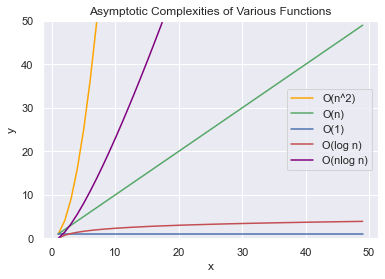

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = np.arange(1,50)

sns.set_theme()

plt.plot(x,x**2,color='orange', label='O(n^2)')
plt.plot(x,x,color='g', label='O(n)')
plt.plot(x,[1]*len(x),color='b', label='O(1)')
plt.plot(x,np.log(x),color='r', label='O(log n)')
plt.plot(x, x*np.log(x), color = 'purple', label='O(nlog n)')

plt.title('Asymptotic Complexities of Various Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.ylim([0,50])

## Matrix dot Product & Strassen Matrix Mutiplication

### Iterative Method

In [5]:
def iterative_dot_product(matrix, order):
    c = []
    for i in range(order):
        row= []
        
        for j in range(order):
            element = 0;
            
            for k in range(order):
                element += matrix[i][k]*matrix[k][j]
            
            row.append(element)
        
        c.append(row)
    return c

a = [[1,2,3],[4,5,6]]
iterative_dot_product(a, len(a))

[[9, 12], [24, 33]]

In [19]:
import numpy as np 
%timeit iterative_dot_product(np.random.randint(0,1000,(256,256), 256)    # around 62k elements

17.6 s ± 400 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Completed Dot product of 10 x 10 matrix in 0.0011411000000407512s
Completed Dot product of 20 x 20 matrix in 0.009522900000320078s
Completed Dot product of 30 x 30 matrix in 0.040461900000082096s
Completed Dot product of 40 x 40 matrix in 0.07526590000043143s
Completed Dot product of 50 x 50 matrix in 0.1426753999999164s
Completed Dot product of 60 x 60 matrix in 0.2438403000001017s
Completed Dot product of 70 x 70 matrix in 0.37903370000003633s
Completed Dot product of 80 x 80 matrix in 0.6228292999999212s
Completed Dot product of 90 x 90 matrix in 0.8917216999998345s
Completed Dot product of 100 x 100 matrix in 1.522650099999737s
Completed Dot product of 110 x 110 matrix in 1.858813999999711s
Completed Dot product of 120 x 120 matrix in 2.0668281000002935s
Completed Dot product of 130 x 130 matrix in 2.4772917999998754s
Completed Dot product of 140 x 140 matrix in 3.346391600000061s
Completed Dot product of 150 x 150 matrix in 4.066251600000214s
Completed Dot product of 160 x 160 mat

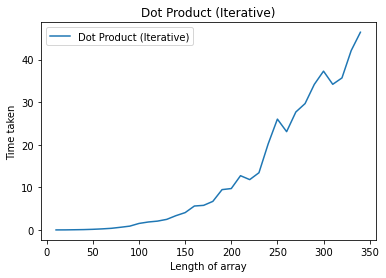

In [23]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

def plot_complexity_iterative_dot_product():
    title = 'Dot Product (Iterative)'
    data = {
        'Size of Matrix':[], 
        'time taken': []
    }
    
    for i in range(1, 35):
        arr = np.random.randint(0, 1000, (10*i,10*i))
        
        start = timer()
        iterative_dot_product(arr,10*i)
        end = timer()
        
        print(f'Completed Dot product of {10*i} x {10*i} matrix in {end-start}s')
        
        data['Size of Matrix'].append(10*i)
        data['time taken'].append(end-start)
        
    plt.plot(data['Size of Matrix'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('Size of Matrix')
    plt.ylabel('Time taken')
    plt.legend()
    
plot_complexity_iterative_dot_product()

Completed Dot product of 0 x 0 matrix in 3.3999999686784577e-06s
Completed Dot product of 100 x 100 matrix in 1.150836599999991s
Completed Dot product of 200 x 200 matrix in 9.21585570000002s
Completed Dot product of 300 x 300 matrix in 31.605928999999946s
Completed Dot product of 400 x 400 matrix in 80.5023344s
Completed Dot product of 500 x 500 matrix in 142.93181209999995s
Completed Dot product of 600 x 600 matrix in 311.1469541s


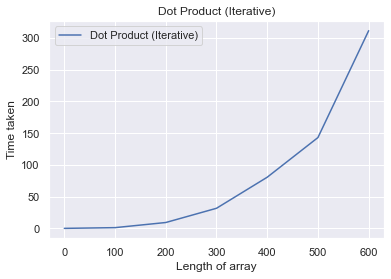

In [4]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

def plot_complexity_iterative_dot_product():
    title = 'Dot Product (Iterative)'
    data = {
        'Size of Matrix':[], 
        'time taken': []
    }
    
    for i in range(0, 700,100):
        arr = np.random.randint(0, 1000, (i,i))
        
        start = timer()
        iterative_dot_product(arr,i)
        end = timer()
        
        print(f'Completed Dot product of {i} x {i} matrix in {end-start}s')
        
        data['Size of Matrix'].append(i)
        data['time taken'].append(end-start)
        
    plt.plot(data['Size of Matrix'], data['time taken'], label=title)
    plt.title(title)
    plt.xlabel('Size of Matrix')
    plt.ylabel('Time taken')
    plt.legend()
    
plot_complexity_iterative_dot_product()

### Strassen's Matrix Multiplication

In [1]:
import numpy as np

# assuming A & B are of same order and its a power of 2
def strassen_matrix_multiplication(A, B):
    # base case
    if len(A) == 1:
        return A*B
    else:

        mid = len(A)//2
        # sub-diving the matrices
        a00, a01 = A[:mid, :mid], A[:mid, mid:]
        a10, a11 = A[mid:, :mid], A[mid:, mid:]

        b00, b01 = B[:mid, :mid], B[:mid, mid:]
        b10, b11 = B[mid:, :mid], B[mid:, mid:]
        
        # using strassen's formula to solve the sub-problems recursively
        m1 = strassen_matrix_multiplication(a00+a11, b00+b11)
        m2 = strassen_matrix_multiplication(a10+a11, b00)
        m3 = strassen_matrix_multiplication(a00,b01-b11)
        m4 = strassen_matrix_multiplication(a11,b10-b00)
        m5 = strassen_matrix_multiplication(a00+a01,b11)
        m6 = strassen_matrix_multiplication(a10-a00,b00+b01)
        m7 = strassen_matrix_multiplication(a01-a11,a10+a11)
        
        return np.hstack((np.vstack((m1+m4-m5+m7,m3+m5)), np.vstack((m2+m4, m1+m3-m2+m6))))

    
a = np.array([[1,2],[2,1]])
strassen_matrix_multiplication(a,a)

array([[5, 4],
       [4, 5]])

In [15]:
import numpy as np
%timeit strassen_matrix_multiplication(np.random.randint(0,1000,(256,256)), np.random.randint(0,1000,(256,256))) #around 65k elements

55.6 s ± 5.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Completed (iterative) Dot product of 1 x 1 matrix in 1.1200000017197453e-05s
Completed (iterative) Dot product of 2 x 2 matrix in 1.8299999965165625e-05s
Completed (iterative) Dot product of 4 x 4 matrix in 8.800000000519503e-05s
Completed (iterative) Dot product of 8 x 8 matrix in 0.0006071000000247295s
Completed (iterative) Dot product of 16 x 16 matrix in 0.00611069999990832s
Completed (iterative) Dot product of 32 x 32 matrix in 0.04809160000013435s
Completed (iterative) Dot product of 64 x 64 matrix in 0.2968120000000454s
Completed (iterative) Dot product of 128 x 128 matrix in 2.4884049999998297s
Completed (iterative) Dot product of 256 x 256 matrix in 18.93759080000018s
Completed (iterative) Dot product of 512 x 512 matrix in 190.54295939999997s
Completed (Strassen) Dot product of 1 x 1 matrix in 7.60000011723605e-06s
Completed (Strassen) Dot product of 2 x 2 matrix in 3.489999994599202e-05s
Completed (Strassen) Dot product of 4 x 4 matrix in 0.0001664000001255772s
Completed (St

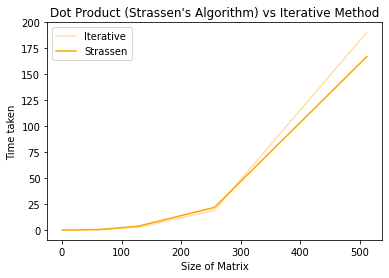

In [17]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

def plot_complexity_iterative_dot_product():
    title = 'Dot Product (Iterative)'
    data = {'Size of Matrix':[], 'time taken': []}
    for i in [2**i for i in range(0,10)]:
        arr = np.random.randint(0, 1000, (i,i))
        start = timer()
        iterative_dot_product(arr,i)
        end = timer()          
        print(f'Completed (iterative) Dot product of {i} x {i} matrix in {end-start}s')
        data['Size of Matrix'].append(i)
        data['time taken'].append(end-start)
        
    plt.plot(data['Size of Matrix'], data['time taken'], color='navajowhite', label="Iterative");

    
def plot_complexity_strassen_dot_product():
    title = 'Dot Product (Strassen\'s Algorithm) vs Iterative Method'
    data = {
        'Size of Matrix':[], 
        'time taken': []
    }
    
    for i in [2**i for i in range(0,10)]:
        arr = np.random.randint(0, 1000, (i,i))
        
        start = timer()
        iterative_dot_product(arr,i)b
        end = timer()
        
        print(f'Completed (Strassen) Dot product of {i} x {i} matrix in {end-start}s')
        
        data['Size of Matrix'].append(i)
        data['time taken'].append(end-start)
    plt.plot(data['Size of Matrix'], data['time taken'], color='orange', label="Strassen");
    plt.title(title)
    plt.xlabel('Size of Matrix')
    plt.ylabel('Time taken')
    plt.legend()


plot_complexity_iterative_dot_product()
plot_complexity_strassen_dot_product()

## Fractional Knapsack Problem

In [79]:
class ItemValue:
    def __init__(self, wt, val, ind):
        self.wt = wt
        self.val = val
        self.ind = ind
        self.cost = val // wt
 
    def __lt__(self, other):
        return self.cost < other.cost
 
# Greedy Approach
 
 
class FractionalKnapSack:
 
    # O(n log n)
    @staticmethod
    def getMaxValue(wt, val, capacity):
        iVal = []
        for i in range(len(wt)):
            iVal.append(ItemValue(wt[i], val[i], i))
        
#         print(iVal)
        # sorting items by value
        iVal.sort(reverse=True)
 
        totalValue = 0
        for i in iVal:
            curWt = int(i.wt)
            curVal = int(i.val)
            if capacity - curWt >= 0:
                capacity -= curWt
                totalValue += curVal
            else:
                fraction = capacity / curWt
                totalValue += curVal * fraction
                capacity = int(capacity - (curWt * fraction))
                break
        return totalValue
 
 

wt = [2, 3, 5, 7, 1, 4, 1]
val = [10, 5, 15, 7, 6, 18, 3]
capacity = 15
 
maxValue = FractionalKnapSack.getMaxValue(wt, val, capacity)
print("Maximum value in Knapsack =", maxValue)

Maximum value in Knapsack = 55.333333333333336


In [70]:
import numpy as np
%timeit FractionalKnapSack.getMaxValue(np.random.randint(1,1000, 10000), np.random.randint(0,1000, 10000), np.random.randint(0,10000,1))

33.5 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
